1) Asking Right Questions,Basic Data info

2) Data Preprocessing

3) Exploratory Data Analysis (take every col and analysis on them

4) Draw Conclusions

5) Conveying Results

# Import Necessary Libraries

In [209]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

# Importing Training and Testing Data-Set

In [210]:
train=pd.read_csv("train.csv")
test=pd.read_csv('tested.csv')

# Shape of the Data-Set

In [211]:
print(f"The training data set have the {train.shape[0]} observations and have {train.shape[1]} columns")

print(f"The testing data set have the {test.shape[0]} observations and have {test.shape[1]} columns")

The training data set have the 891 observations and have 12 columns
The testing data set have the 418 observations and have 12 columns


In [212]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Info About Training Data Set

In [213]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Info About Testing Data-Set

In [214]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Dropping Cabin Col Due to Maximum Null Values

In [215]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

# Data Cleaning of Training Data-Set

In [216]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [217]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [218]:
train['Embarked'].mode()

0    S
dtype: object

# Filling Embarked Col with its Mode

In [219]:
train['Embarked'].fillna("S",inplace=True)

# Filling Age col

In [220]:
train_age=np.random.randint(train['Age'].mean()- train['Age'].std() , train['Age'].mean()+train['Age'].std(),177)
train_age

array([16, 33, 24, 33, 43, 15, 27, 34, 18, 22, 31, 33, 21, 18, 17, 18, 19,
       19, 24, 28, 36, 15, 35, 28, 33, 19, 29, 16, 27, 35, 25, 26, 40, 42,
       21, 37, 41, 36, 24, 15, 19, 25, 35, 31, 23, 37, 18, 34, 34, 19, 19,
       15, 35, 19, 25, 19, 30, 16, 36, 25, 31, 24, 19, 38, 17, 40, 32, 32,
       19, 25, 19, 26, 18, 27, 20, 36, 36, 17, 21, 33, 17, 39, 25, 35, 36,
       15, 37, 40, 39, 33, 36, 41, 29, 25, 35, 29, 27, 43, 19, 28, 20, 42,
       19, 21, 25, 42, 28, 31, 30, 39, 21, 17, 31, 23, 31, 38, 20, 42, 20,
       23, 23, 20, 35, 36, 40, 24, 34, 18, 38, 26, 32, 16, 36, 27, 20, 21,
       35, 24, 19, 38, 26, 36, 17, 20, 20, 34, 43, 18, 38, 41, 38, 27, 21,
       37, 37, 26, 42, 20, 39, 42, 31, 28, 25, 38, 22, 31, 26, 20, 19, 37,
       42, 23, 16, 18, 29, 40, 24])

In [221]:
train['Age'][train['Age'].isnull()].shape


(177,)

In [222]:
train['Age'][train['Age'].isnull()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [223]:
train['Age'][train['Age'].isnull()]=train_age

<ipython-input-223-603ae26aeeb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [224]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Training Data is Cleaned,Now Time to Clean Testing Data-Set

In [225]:
test.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

# Filling Age Col

In [226]:
test_age=np.random.randint(test['Age'].mean()- test['Age'].std() , test['Age'].mean()+test['Age'].std(),86)
test_age

array([28, 33, 31, 26, 29, 23, 31, 28, 40, 41, 40, 29, 43, 30, 30, 24, 28,
       25, 35, 25, 38, 28, 24, 28, 17, 32, 22, 25, 36, 19, 40, 33, 35, 19,
       22, 16, 18, 31, 24, 35, 27, 23, 27, 35, 24, 34, 35, 41, 30, 22, 30,
       24, 39, 31, 43, 28, 32, 37, 18, 43, 39, 24, 25, 33, 18, 38, 17, 27,
       43, 40, 39, 21, 18, 36, 37, 33, 31, 17, 21, 20, 31, 33, 39, 22, 34,
       37])

In [227]:
test['Age'][test['Age'].isnull()]=test_age

<ipython-input-227-abf9310a3d93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age



# Filling Fare Col

In [228]:
test["Fare"].fillna(test['Fare'].mean(),inplace=True)

In [229]:
test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Exploratory Data Analysis

In [230]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [231]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [232]:
train[train['Pclass']==3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

# Raltionship of Pclass with Survived col 

In [233]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

# Relationship of Sex with Survived Col

In [234]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [235]:
train.groupby("Sex")['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [236]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [237]:
len(train[(train['Sex']=='female') & (train['Survived']==1)])

233

In [238]:
len(train[(train['Sex']=='male') & (train['Survived']==1)])

109

In [239]:
len(train[(train['Sex']=='female') & (train['Survived']==0)])

81

In [240]:
len(train[(train['Sex']=='male') & (train['Survived']==0)])

468

In [241]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [242]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [243]:
train.groupby("Sex")['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

# Relationship of Embarked with Survived Col

In [244]:
train.groupby("Embarked")['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

# Analysis and Graphical Representation of Age col

C:\Downloaded Software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

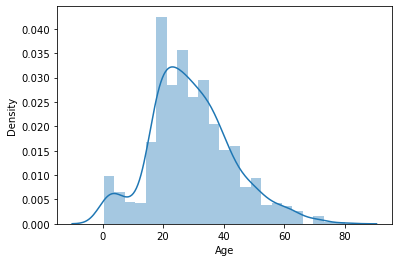

In [245]:
sns.distplot(train['Age'])

C:\Downloaded Software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

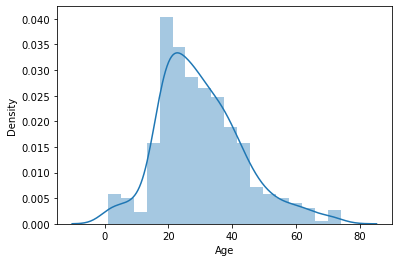

In [246]:
sns.distplot(train['Age'][train['Survived']==0])

C:\Downloaded Software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

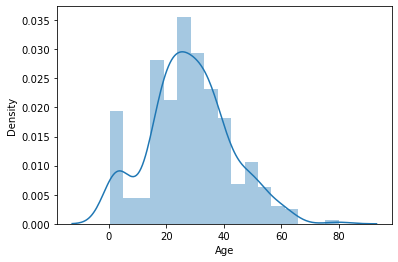

In [247]:
sns.distplot(train['Age'][train['Survived']==1])

C:\Downloaded Software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Downloaded Software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

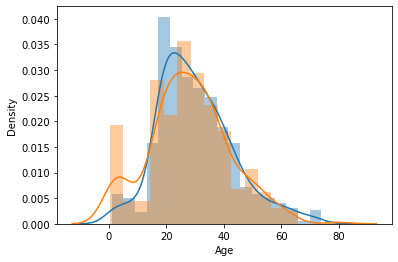

In [248]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

# Relationship Between Fare and Survived Col

C:\Downloaded Software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Downloaded Software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

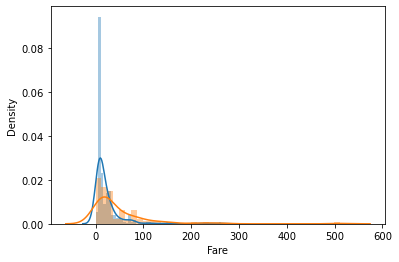

In [249]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

# Dropping Ticket Col

In [250]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

# Combining SibSp and Parch

In [251]:
test['Family']=test['SibSp']+train['Parch'] +1

In [252]:
train['Family']=train['SibSp']+train['Parch'] +1

In [253]:
train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [254]:
train.groupby("Family")['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

# Applying Function on Training and Testing Data

In [255]:
def order(number):
    if number==1:
        return 'Alone'
    elif number>1 and number<5:
        return 'Medium'
    else:
        return "Large"

In [256]:
train['Family_Size']=train['Family'].apply(order)

In [257]:
train.shape

(891, 12)

In [258]:
train['Family_Size'].value_counts()

Alone     537
Medium    292
Large      62
Name: Family_Size, dtype: int64

In [259]:
test['Family_Size']=test['Family'].apply(order)

In [260]:
test.shape

(418, 12)

# Dropping Family,Parch and SibSp col

In [261]:
train=train.drop(columns=['Family','Parch','SibSp'])

In [262]:
train.shape

(891, 9)

In [263]:
test=test.drop(columns=['Family','Parch','SibSp'])

In [264]:
test.shape

(418, 9)

# Saving Passenger-ID of Test Col

In [265]:
passengerID=test['PassengerId'].values

# Dropping PassengerId and Name Col

In [266]:
train=train.drop(columns=['PassengerId','Name'])
test=test.drop(columns=['PassengerId','Name'])

# Following Data has been left now

In [267]:
train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium


# Converting Categorical Data into Numerical Data of Training Data-Set 

In [268]:
train=pd.get_dummies(train,columns=['Embarked','Family_Size','Sex','Pclass'],drop_first=True)


In [269]:
train.shape

(891, 10)

In [270]:
train.head(2)

,Survived,Age,Fare,Embarked_Q,Embarked_S,Family_Size_Large,Family_Size_Medium,Sex_male,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,1,0,1,1,0,1
1,1,38.0,71.2833,0,0,0,1,0,0,0


# Converting Categorical Data into Numerical Data of Testing Data Set

In [ ]:
test=pd.get_dummies(test,columns=['Embarked','Family_Size','Sex','Pclass'],drop_first=True)

In [ ]:
test.shape

# Slecting Training and Testing Data-Set

In [ ]:
X=train.iloc[:,1:].values
Y=train.iloc[:,0:1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Applying Decision Tree on Training Data-Set

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
classifier=DecisionTreeClassifier()



In [ ]:
classifier.fit(x_train,y_train)


In [ ]:
y_pred=classifier.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred,y_test)

# Using Testing Data-Set to Predict Final Output

In [ ]:
test=test.drop(columns="Survived")

In [ ]:
test.head(2)

In [ ]:
x_test_=test.iloc[:,:].values



x_test_

In [ ]:
y_final_=classifier.predict(x_test_)
y_final_

In [ ]:
y_final_.shape

# Creating Final DataFrame

In [ ]:
passengerID.shape

In [ ]:
final=pd.DataFrame()
final

In [ ]:
final['passengerID']=passengerID
final['Survived']=y_final_

In [ ]:
final

In [ ]:
final.to_csv("Submission.csv",index=False)

# Comparison Between y_final_ and tested.csv

In [ ]:
dff=pd.read_csv("tested.csv")
dff['Survived'].value_counts()

In [ ]:
final['Survived'].value_counts()